# MNIST Classification via a Neural Network

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
(Xtr, ytr), (Xts, yts) = tf.keras.datasets.mnist.load_data()

Xtr = 2*(Xtr/255-0.5)
ntr, nrow, ncol = Xtr.shape
Xtr = Xtr.reshape((ntr,nrow*ncol))

Xts = 2*(Xts/255 - 0.5)
nts, nrow, ncol = Xts.shape
Xts = Xts.reshape((nts,nrow*ncol))

print(ntr, nrow, ncol)

60000 28 28


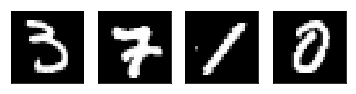

In [5]:
def plt_digit(x):
    nrow = 28
    ncol = 28
    xsq = x.reshape((nrow,ncol))
    plt.imshow(xsq,  cmap='Greys_r')
    plt.xticks([])
    plt.yticks([])

# Select random digits
nplt = 4
nsamp = Xtr.shape[0]
Iperm = np.random.permutation(nsamp)

# Plot the images using the subplot command
for i in range(nplt):
    ind = Iperm[i]
    plt.subplot(1,nplt, i+1)
    plt_digit(Xtr[ind,:])


# Create a Simple Neutral Network

In [12]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Activation
import tensorflow.keras.backend as K
K.clear_session()

In [16]:
nin = Xtr.shape[1]
nh = 100
nout = int(np.max(ytr)+1)
model = Sequential()
model.add(Dense(units=nh, input_shape=(nin,), activation='sigmoid', name='hidden'))
model.add(Dense(units=nout,activation='softmax',name='output'))
print(nin,nh,nout)

784 100 10


In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 100)               78500     
_________________________________________________________________
output (Dense)               (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


# Training the network

In [18]:
from tensorflow.keras import optimizers
opt = optimizers.Adam(lr=0.001)
model.compile(optimizer=opt,
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [19]:
hist = model.fit(Xtr,ytr,epochs=30,batch_size=100,validation_data=(Xts,yts))


Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 2s 31us/step - loss: 0.5049 - acc: 0.8697 - val_loss: 0.2809 - val_acc: 0.9202
Epoch 2/30
60000/60000 [==============================] - 1s 16us/step - loss: 0.2556 - acc: 0.9278 - val_loss: 0.2278 - val_acc: 0.9367
Epoch 3/30
60000/60000 [==============================] - 1s 16us/step - loss: 0.2021 - acc: 0.9423 - val_loss: 0.1839 - val_acc: 0.9473
Epoch 4/30
60000/60000 [==============================] - 1s 18us/step - loss: 0.1693 - acc: 0.9520 - val_loss: 0.1588 - val_acc: 0.9538
Epoch 5/30
60000/60000 [==============================] - 1s 17us/step - loss: 0.1452 - acc: 0.9589 - val_loss: 0.1419 - val_acc: 0.9588
Epoch 6/30
60000/60000 [==============================] - 1s 17us/step - loss: 0.1257 - acc: 0.9644 - val_loss: 0.1307 - val_acc: 0.9625
Epoch 7/30
60000/60000 [==============================] - 1s 16us/step - loss: 0.1115 - acc: 0.9689 - val_loss: 0.1198 - val_acc

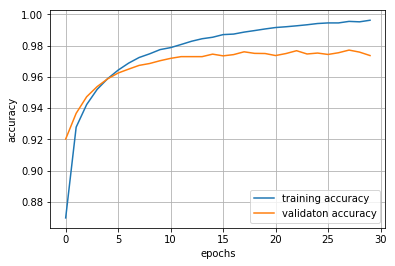

In [20]:
tr_accuracy = hist.history['acc']
val_accuracy = hist.history['val_acc']

plt.plot(tr_accuracy)
plt.plot(val_accuracy)
plt.grid()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['training accuracy','validaton accuracy'])

# Saving and loading the model

In [21]:
model.save('mnist_mod.h5')


In [ ]:
from tensorflow.keras.models import load_model

model = load_mode